<div style="background-color: #f0f8ff; padding: 20px; border-radius: 10px; text-align: center; border: 2px solid #4682b4;">
    <h1 style="color: #2c3e50; font-family: 'Helvetica Neue', sans-serif; font-size: 2.5em; text-shadow: 1px 1px 2px #bdc3c7;">
        Loan Approval Prediction System
    </h1>
    <p style="color: #34495e; font-family: 'Helvetica Neue', sans-serif; font-size: 1.2em; margin-top: -10px;">
        <strong>Réalisé par :</strong> KHOUMRI Tarik, ZOUHARI Dyae Errahmane, MONTAKI Souhaib & SAMY AYOUB
    </p>
    <img src="../static/images/dataset-cover.jpg" alt="Loan Approval" style="width: 70%; margin-top: 15px; border-radius: 10px; box-shadow: 0 4px 8px rgba(0,0,0,0.1);">
</div>

<h4 style="color: #6c6d6eff;">In this notebook, we will follow a Data Science approach,  CRISP-DM (Cross-Industry Standard Process for Data Mining) lifecycle.</h4>
<div style="text-align: center;">
    <img src="../static/images/crisp_process.jpg" alt="CRISP-DM" style="display: block; margin-left: auto; margin-right: auto; width: 50%;">
</div>

<h2>I. Business understanding </h2>

Objective:  Predict Loan Approval using applicant Data 

<h5>Importing packages</h5>

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score , precision_score , recall_score , f1_score




<h2>II. Data understanding </h2>

The loan approval dataset is a collection of financial records and associated information used to determine the eligibility of individuals or organizations for obtaining loans from a lending institution. It includes various factors such as cibil score, income, employment status, loan term, loan amount, assets value, and loan status.

<h4>1. Columns recensement</h4>

<p style="margin-top:0.1rem; margin-bottom:1rem; color:#333;">
  Description of the dataset columns.
</p>

<table style="border-collapse:collapse; width:100%; max-width:1000px;">
  <thead>
    <tr style="background:#f2f4f7; text-align:left;">
      <th style="padding:8px 12px; border:1px solid #e1e4ea;">Variable</th>
      <th style="padding:8px 12px; border:1px solid #e1e4ea;">Description</th>
      <th style="padding:8px 12px; border:1px solid #e1e4ea;">Type</th>
      <th style="padding:8px 12px; border:1px solid #e1e4ea;">Role</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">loan_id</td>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">Unique identifier of the loan</td>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">Categorical (ID)</td>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">Ignore for modeling</td>
    </tr>
    <tr>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">no_of_dependents</td>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">Number of dependents</td>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">Numerical (discrete)</td>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">Feature</td>
    </tr>
    <tr>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">education</td>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">Education level (Graduate / Not Graduate)</td>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">Categorical</td>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">Feature</td>
    </tr>
    <tr>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">self_employed</td>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">Indicates if the applicant is self-employed (Yes/No)</td>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">Categorical</td>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">Feature</td>
    </tr>
    <tr>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">income_annum</td>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">Annual income</td>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">Numerical (continuous)</td>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">Feature</td>
    </tr>
    <tr>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">loan_amount</td>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">Requested loan amount</td>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">Numerical (continuous)</td>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">Feature</td>
    </tr>
    <tr>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">loan_term</td>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">Loan duration (e.g., in months)</td>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">Numerical (discrete)</td>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">Feature</td>
    </tr>
    <tr>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">cibil_score</td>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">Credit score (range 300–900)</td>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">Numerical (continuous)</td>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">Feature (very important)</td>
    </tr>
    <tr>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">residential_assets_value</td>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">Value of residential assets</td>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">Numerical (continuous)</td>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">Feature</td>
    </tr>
    <tr>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">commercial_assets_value</td>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">Value of commercial assets</td>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">Numerical (continuous)</td>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">Feature</td>
    </tr>
    <tr>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">luxury_assets_value</td>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">Value of luxury assets</td>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">Numerical (continuous)</td>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">Feature</td>
    </tr>
    <tr>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">bank_asset_value</td>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">Bank assets (savings/liquid assets)</td>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">Numerical (continuous)</td>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">Feature</td>
    </tr>
    <tr>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">loan_status</td>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">Loan status: Approved / Rejected</td>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">Categorical (target)</td>
      <td style="padding:8px 12px; border:1px solid #e1e4ea;">Target</td>
    </tr>
  </tbody>
</table>


<h4>2. Importing DataSet</h4>

In [60]:
Df = pd.read_csv(r"loan_approval_dataset.csv")
Df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [61]:
# Clean up column names by stripping leading/trailing whitespace
Df.columns = Df.columns.str.strip()
Df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [62]:
Df.tail()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved
4268,4269,1,Graduate,No,9200000,29700000,10,607,17800000,11800000,35700000,12000000,Approved


<h4>3. Describing DataSet</h4>

In [63]:
#check the distribution of numerical variables :
print("descreptiv statistics of the data  : \n")
Df.describe().T

descreptiv statistics of the data  : 



,count,mean,std,min,25%,50%,75%,max
loan_id,4269.0,2.135000e+03,1.232498e+03,1.0,1068.0,2135.0,3202.0,4269.0
no_of_dependents,4269.0,2.498712e+00,1.695910e+00,0.0,1.0,3.0,4.0,5.0
income_annum,4269.0,5.059124e+06,2.806840e+06,200000.0,2700000.0,5100000.0,7500000.0,9900000.0
loan_amount,4269.0,1.513345e+07,9.043363e+06,300000.0,7700000.0,14500000.0,21500000.0,39500000.0
loan_term,4269.0,1.090045e+01,5.709187e+00,2.0,6.0,10.0,16.0,20.0
cibil_score,4269.0,5.999361e+02,1.724304e+02,300.0,453.0,600.0,748.0,900.0
residential_assets_value,4269.0,7.472617e+06,6.503637e+06,-100000.0,2200000.0,5600000.0,11300000.0,29100000.0
commercial_assets_value,4269.0,4.973155e+06,4.388966e+06,0.0,1300000.0,3700000.0,7600000.0,19400000.0
luxury_assets_value,4269.0,1.512631e+07,9.103754e+06,300000.0,7500000.0,14600000.0,21700000.0,39200000.0
bank_asset_value,4269.0,4.976692e+06,3.250185e+06,0.0,2300000.0,4600000.0,7100000.0,14700000.0


Information : the descreption table shows that there is a huge differance between the ranges of the columns which mean that we have to do some normalisations to scale the data to a common range . 

In [64]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


yaaaaay there is no missing value but we have a lot of incompatible columns types which mean we have to transform the columns types in the phase of preprocessing

In [65]:
print("the number of values in each column :")
print(Df.nunique())

print(f"the shape of our data : {Df.shape[0]} Columns and {Df.shape[1]} rows")

the number of values in each column :
loan_id                     4269
no_of_dependents               6
education                      2
self_employed                  2
income_annum                  98
loan_amount                  378
loan_term                     10
cibil_score                  601
residential_assets_value     278
commercial_assets_value      188
luxury_assets_value          379
bank_asset_value             146
loan_status                    2
dtype: int64
the shape of our data : 4269 Columns and 13 rows


<h4>4. Verify The Quality Of Data:</h4>

<h5>4.1 verify the redondant values : </h5>

In [66]:
Df.duplicated().sum()

np.int64(0)

we have no duplicate values

<h5>4.2 verify the Missing values : </h5>

In [67]:
Df.isna().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

<h5>4.3 verify the Types of Columns  : </h5>

In [68]:
Df.dtypes

loan_id                      int64
no_of_dependents             int64
education                   object
self_employed               object
income_annum                 int64
loan_amount                  int64
loan_term                    int64
cibil_score                  int64
residential_assets_value     int64
commercial_assets_value      int64
luxury_assets_value          int64
bank_asset_value             int64
loan_status                 object
dtype: object

We have to do some Data Encoding to pass from the categorical data to numerical data in order to apply a modeling approach 

<h5>4.4 verify the Presence of outliers : </h5>

Index(['loan_id', 'no_of_dependents', 'income_annum', 'loan_amount',
       'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value'],
      dtype='object')


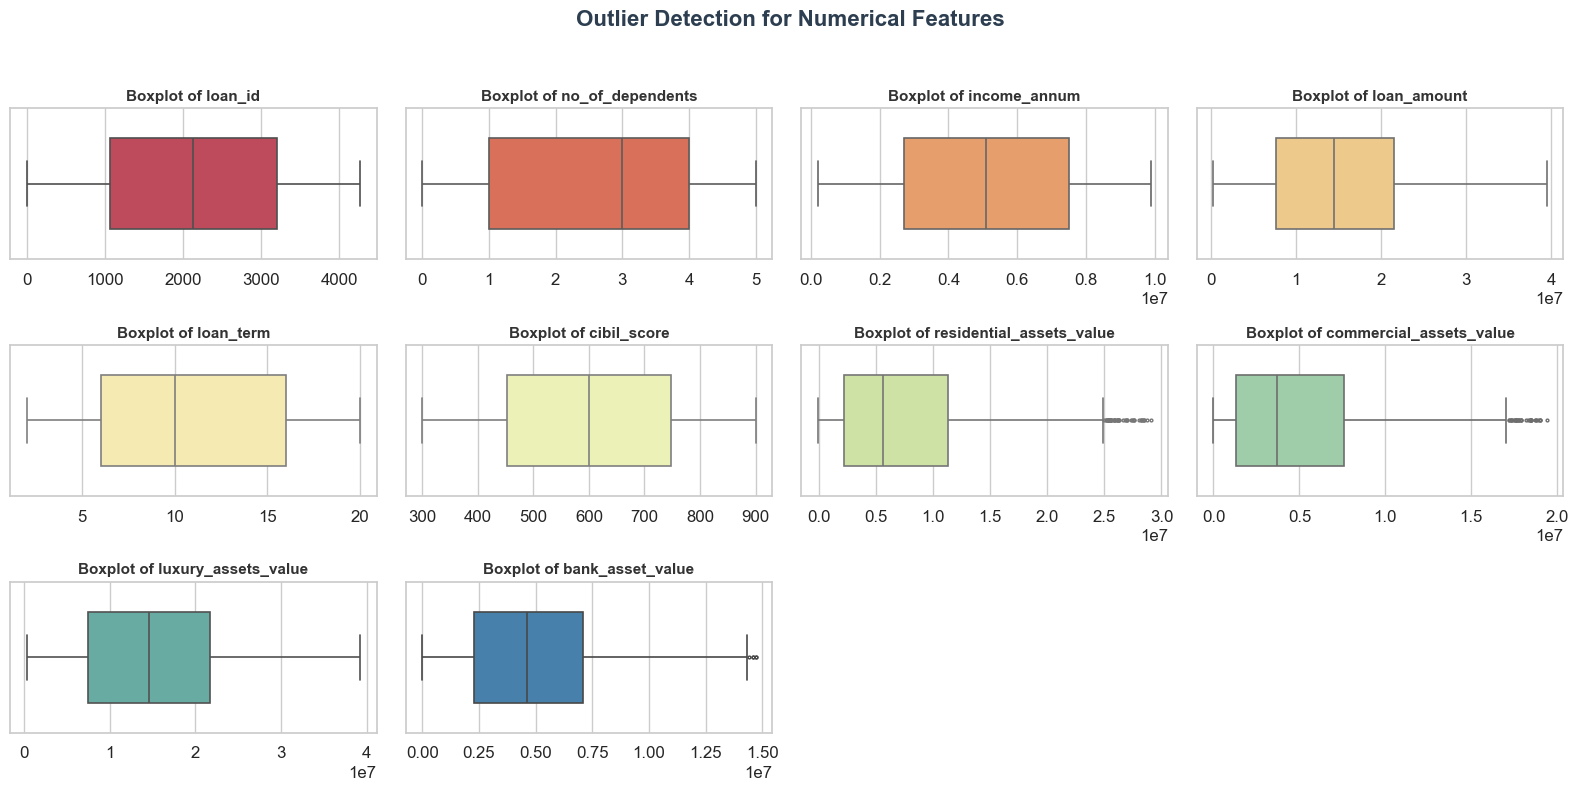

In [69]:
# Select numerical columns
numerical = Df.select_dtypes(include=['int64', 'float64']).columns
print(numerical)
# Set seaborn theme
sns.set(style="whitegrid", palette="Spectral", font_scale=1.1)

# Define color palette (vivid & unique)
palette = sns.color_palette("Spectral", len(numerical))

# Plot
plt.figure(figsize=(16, 10))
for i, col in enumerate(numerical, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(
        x=Df[col],
        color=palette[i-1],
        width=0.6,
        fliersize=2,  
        linewidth=1.2
    )
    plt.title(f"Boxplot of {col}", fontsize=11, fontweight="bold", color="#333333")
    plt.xlabel("")  
plt.suptitle("Outlier Detection for Numerical Features", fontsize=16, fontweight="bold", color="#2c3e50")
plt.tight_layout(rect=[0, 0, 1, 0.96])  # space for suptitle
plt.show()

INFORMATION : 
- The asset-related features (residential_assets_value, commercial_assets_value, luxury_assets_value, bank_asset_value) show strong right-skewness with many high-value outliers, indicating that most applicants have low to moderate assets while a small group holds extremely large asset values.

- These outliers can affect model performance, especially in asset-related columns. Transformations such as log scaling or winsorization/capping are recommended before modeling.

<h4>5. EDA Exploratory Data analysis</h4>

I have included this section in the Data understanding for better visualize the distrbution of data also to get overview about the corelation between variables and better understand the data

Also in this section we wil response the question : what is the most variables that Affect our target ?.

In [70]:
#Before starting we set loan_id  column as the index of our dataset : 
Df.set_index("loan_id",inplace=True)
Df.head()


,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
loan_id,,,,,,,,,,,,
1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


<h5> 5.1 The Proportion Of Loan_Approval Values </h5>

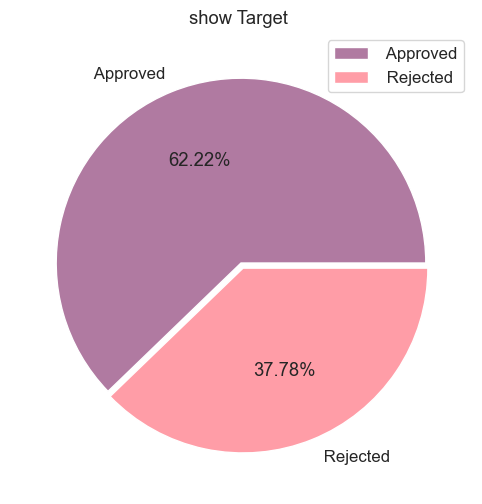

In [79]:
#show Target columns Analysis 
consistent_colors = [  '#B07AA1', '#FF9DA7']
plt.figure(figsize=(10,6))
explode = (0,0.03)
plt.pie(Df['loan_status'].value_counts().values,
        labels=Df['loan_status'].value_counts().index,
        colors=consistent_colors[:len(Df['loan_status'].value_counts())],
        explode=explode,
        autopct="%1.2f%%",
        )
plt.title('show Target ')
plt.legend()
plt.show()

We constate that we have a dominated class (approved classe) with 2600 rows 62.22% 

<h5> 5.2 Show The Distrbution of Numerical Data </h5>

Index([' no_of_dependents', ' income_annum', ' loan_amount', ' loan_term',
       ' cibil_score', ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value'],
      dtype='object')


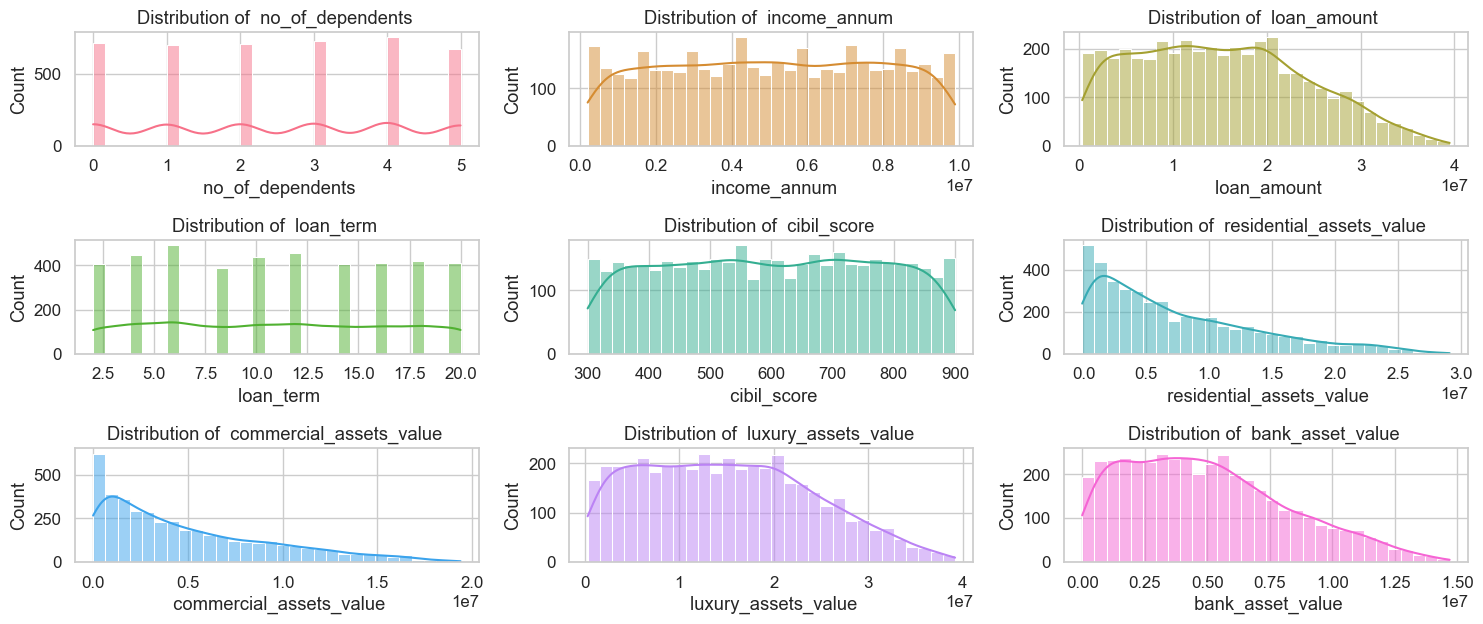

In [ ]:
# Select numerical columns
numerical = Df.select_dtypes(include=['int64', 'float64']).columns
print(numerical)
#show Distribution for all numerical columns 
palette =sns.color_palette("husl",len(numerical))

plt.figure(figsize=(15,8))

#for loop 
for i,col in enumerate(numerical,1):
    plt.subplot(4,3,i)
    sns.histplot(Df[col],kde=True ,color=palette[i-1], bins=30)
    plt.title(f'Distribution of {col} ')

plt.tight_layout()
plt.show()



Observations and Insights from Distribution Plots : 

- Many financial features—including residential, commercial, luxury, and bank asset values, as well as loan_amount—show strong  right-skewness, with most values clustered low and a long tail of very large values.

- The cibil_score is left-skewed, while income_annum and loan_id display near-uniform distributions. Discrete variables such as no_of_dependents and loan_term show expected bar-shaped patterns.

- The distinction between continuous vs. discrete variables is clear in the histograms; KDE curves can be misleading for discrete features.

- The strong skew in financial variables indicates a need for preprocessing steps such as log or square-root transformations to normalize distributions and improve model performance.

<h5> 5.3 Relation between Target column with Categorical columns  </h5>

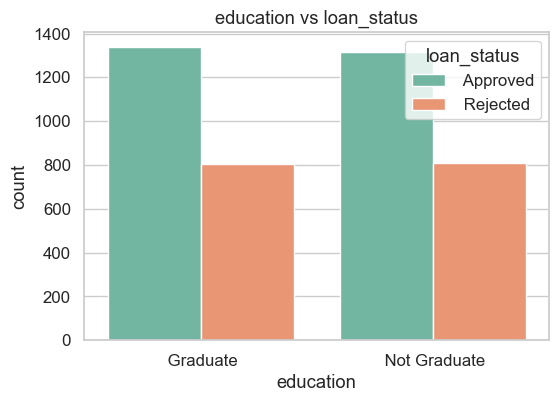

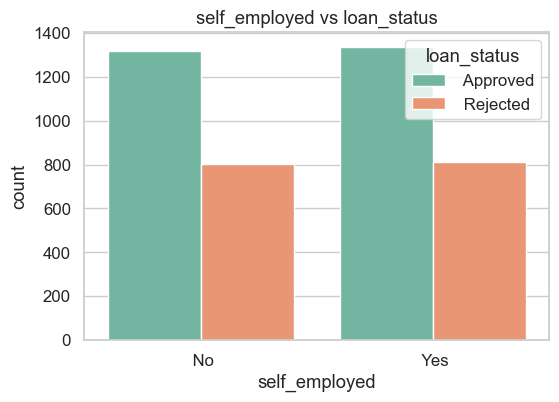

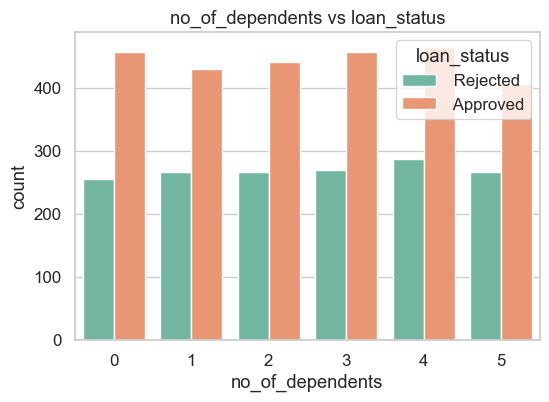

In [72]:
Df.columns = Df.columns.str.strip()

target = "loan_status"

# Categorical
categorical = ["education", "self_employed", "no_of_dependents"]
for col in categorical:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue=target, data=Df, palette="Set2")
    plt.title(f"{col} vs {target}")
    plt.show()



We remarque that the categorical havn't a highly impact about the Target Column 
and  their values change is not very impactfull . So the financial responsabilities can be the real reason to approve a loan. 

<h5> 5.4 Relation between Target column with Numerical columns  </h5>

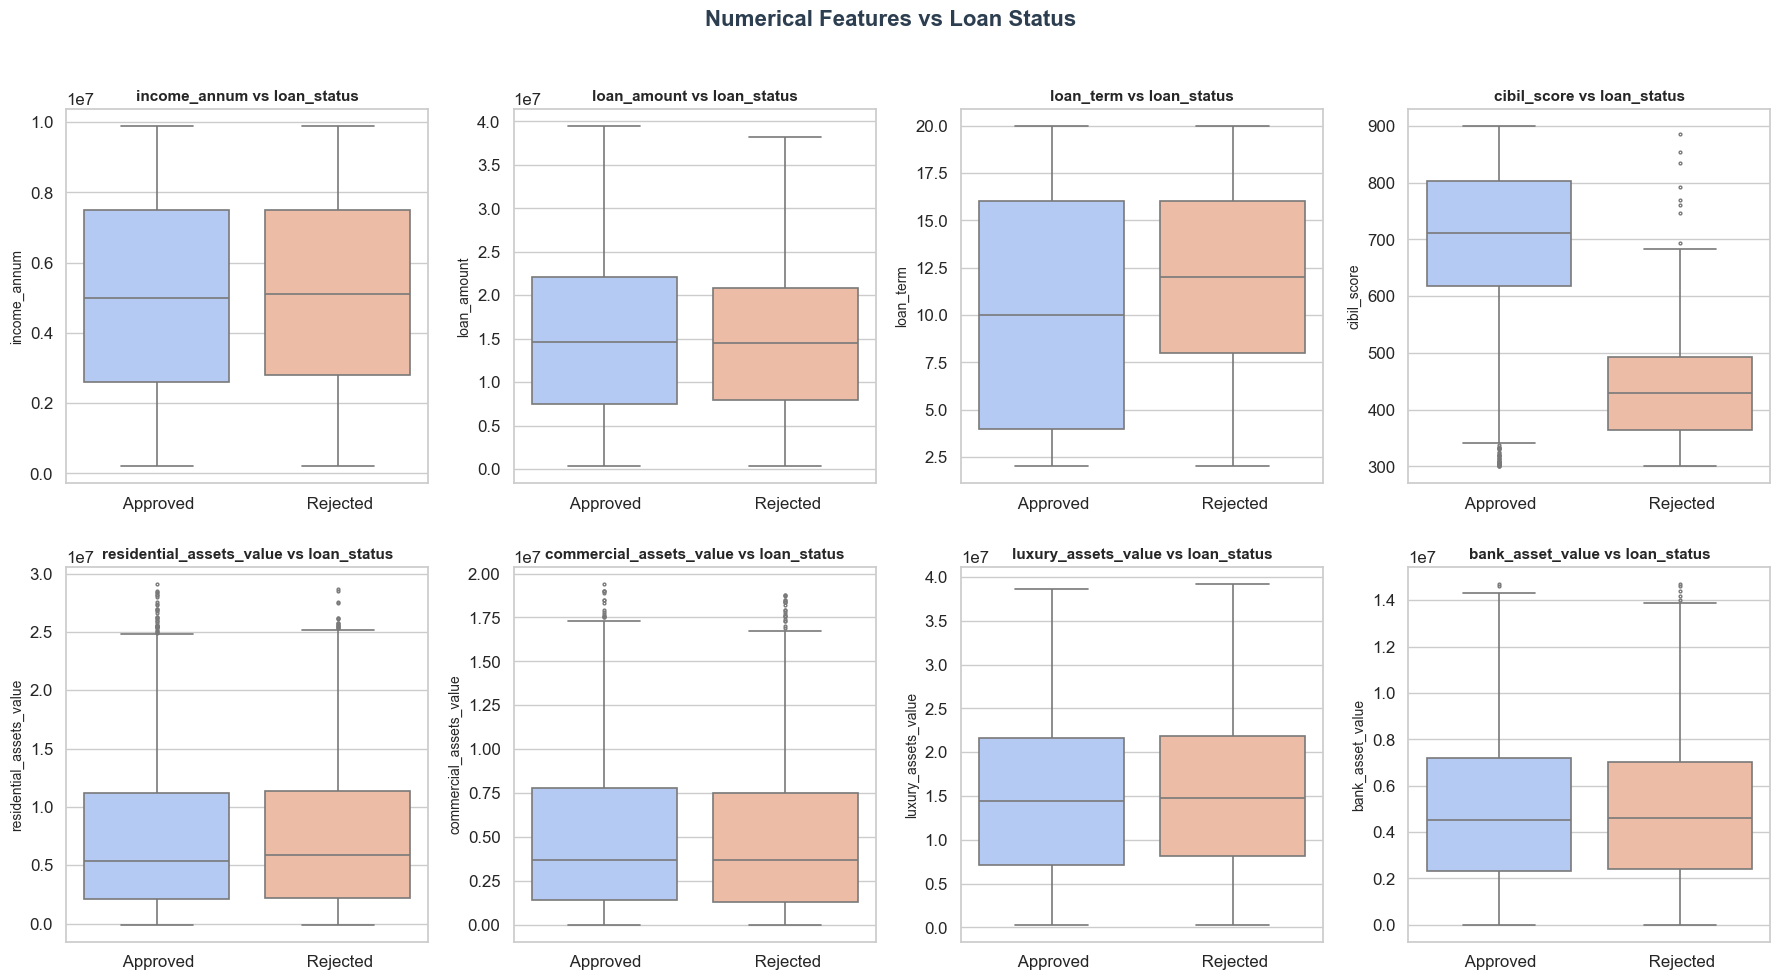

In [77]:
numerical = [
    "income_annum", "loan_amount", "loan_term", "cibil_score",
    "residential_assets_value", "commercial_assets_value",
    "luxury_assets_value", "bank_asset_value"
]


fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 10))
axes = axes.flatten()  

for i, col in enumerate(numerical):
    sns.boxplot(
        data=Df, 
        x=target, 
        y=col, 
        ax=axes[i], 
        palette="coolwarm",
        hue=target,
        legend=False,
        fliersize=2, 
        linewidth=1.2
    )
    axes[i].set_title(f"{col} vs {target}", fontsize=11, fontweight="bold")
    axes[i].set_xlabel("")  
    axes[i].set_ylabel(col, fontsize=10)

plt.suptitle("Numerical Features vs Loan Status", fontsize=16, fontweight="bold", color="#2c3e50")
plt.tight_layout(rect=[0, 0, 1, 0.96])  
plt.show()

Information : CIBIL Score is the strongest predictor of loan status, with approved applicants having a significantly better score. While approved loans tend to be smaller in amount and shorter in term, high asset values surprisingly show a mild negative correlation with approval, possibly indicating rejection for complex or overly large loan applications from high-net-worth individuals.

<h3>III-DATA PREPROCESSING</h3>

##### After the verification of the quality of data lets imrove this quality and enforce the data to embrace the modling phase

<h4> 1. Columns rename : </h4> 

In [81]:
# renaming the index : 
Df.index.names = ['Loan_Id']

# renaming the columns  : 
headers = ["Dependants_namber","Education","Self_Employed","Annula_Income","Loan_Amount","Loan_Period_Months","Credit_Score","Residential_Assets","Commercial_Assets","Luxury_Assets","Bank_Assets","Loan_Approval_Status"]
Df.columns = headers

In [82]:
Df.head()

,Dependants_namber,Education,Self_Employed,Annula_Income,Loan_Amount,Loan_Period_Months,Credit_Score,Residential_Assets,Commercial_Assets,Luxury_Assets,Bank_Assets,Loan_Approval_Status
Loan_Id,,,,,,,,,,,,
1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


<h4> 2. Data Transformation : </h4> 

<h5> 2.1 Encoding Categorical Data : <h5>



- We used Label Encoding to convert categorical variables like education, self_employed, and loan_status into numerical form for model training.
    
- Machine learning algorithms cannot process text labels directly, so encoding ensures they can interpret categories as numeric values.

- We chose Label Encoding because these features have only two categories (binary) — making it a simple, efficient, and memory-friendly method compared to One-Hot Encoding.

- It helps keep the dataset compact and ready for ML models that expect numerical input.



In [84]:
# Encode to categorical
le = LabelEncoder()
Df['Education'] = le.fit_transform(Df['Education'])
Df['Self_Employed'] = le.fit_transform(Df['Self_Employed'])
Df['Loan_Approval_Status'] = le.fit_transform(Df['Loan_Approval_Status'])

Df.head()

,Dependants_namber,Education,Self_Employed,Annula_Income,Loan_Amount,Loan_Period_Months,Credit_Score,Residential_Assets,Commercial_Assets,Luxury_Assets,Bank_Assets,Loan_Approval_Status
Loan_Id,,,,,,,,,,,,
1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


NB : in the Loan_Approval_Status 

    Approved = 0
    Rejected = 1